In [1]:
Observed Trend 1: The total rides, drivers, and fares are the highest in the Urban areas
Observed Trend 2: The average fare is pretty close in the Suburban and Rural areas
Observed Trend 3: The % of drivers in the Suburban areas are increasing which would eventually lead to the increase in the total number rides and fares

SyntaxError: invalid syntax (<ipython-input-1-804d171f9a9d>, line 1)

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
csvpath = os.path.join('..', 'city_data.csv')
city_data = pd.read_csv(csvpath)
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
csvpath1 = os.path.join('..', 'ride_data.csv')
ride_data = pd.read_csv(csvpath1)
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,1/16/16 13:49,38.35,5.403690e+12
1,South Roy,1/2/16 18:42,17.49,4.036270e+12
2,Wiseborough,1/21/16 17:35,44.18,3.645040e+12
3,Spencertown,7/31/16 14:53,6.87,2.242600e+12
4,Nguyenbury,7/9/16 4:42,6.28,1.543060e+12


In [5]:
merge_data = pd.merge(ride_data, city_data, on = 'city', how = 'outer')
#merge_data = merge_data.set_index("type")
merge_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,1/16/16 13:49,38.35,5.403690e+12,46,Urban
1,Sarabury,7/23/16 7:42,21.76,7.546680e+12,46,Urban
2,Sarabury,4/2/16 4:32,38.03,4.932500e+12,46,Urban
3,Sarabury,6/23/16 5:03,26.82,6.711040e+12,46,Urban
4,Sarabury,9/30/16 12:48,30.30,6.388740e+12,46,Urban


In [6]:
scatter_urban_data = merge_data[merge_data['type'] == 'Urban']
scatter_suburban_data = merge_data[merge_data['type'] == 'Suburban']
scatter_rural_data = merge_data[merge_data['type'] == 'Rural']
scatter_urban_data = scatter_urban_data.sum()
scatter_suburban_data = scatter_suburban_data.sum()
scatter_rural_data = scatter_rural_data.sum()
print(scatter_urban_data)
print(scatter_suburban_data)
print(scatter_rural_data)


city            SaraburySaraburySaraburySaraburySaraburySarabu...
date            1/16/16 13:497/23/16 7:424/2/16 4:326/23/16 5:...
fare                                                      40078.3
ride_id                                               7.89019e+15
driver_count                                                64501
type            UrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanU...
dtype: object
city            Port JamesPort JamesPort JamesPort JamesPort J...
date            12/4/16 6:1612/4/16 6:165/16/16 21:255/16/16 2...
fare                                                      20335.7
ride_id                                               3.13958e+15
driver_count                                                 9730
type            SuburbanSuburbanSuburbanSuburbanSuburbanSuburb...
dtype: object
city            HornelandHornelandHornelandHornelandKinghavenK...
date            7/19/16 10:073/22/16 21:221/26/16 9:383/25/16 ...
fare                                            

In [7]:
#average city ride fare
city_fare = merge_data.groupby(['city', 'type', 'driver_count'])
# urban_fare = merge_data.loc[['Urban'],['city','fare','driver_count']]
# urban_fare['Average Fare'] = urban_fare['fare'].mean()
# urban_fare['Total number of Rides'] = urban_fare['fare'].count()

# city_fare_agg = pd.DataFrame(city_fare)
city_fare_agg = city_fare['fare'].agg(['sum','count']).reset_index(level=1)
#urban_city = urban_fare.groupby(['type', 'city'])
#city_fare_agg = city_fare_agg.rename(columns={"count": "Total", "type": "ciyt_type"})
# # city_fare = city_fare["Total"]
#city_fare_agg.head()
#city_fare_agg.head()
city_fare_agg.head()


,,type,sum,count
city,driver_count,,,
Alvarezhaven,21,Urban,741.79,31
Alyssaberg,67,Urban,535.85,26
Anitamouth,16,Suburban,335.84,9
Antoniomouth,21,Urban,519.75,22
Aprilchester,49,Urban,417.65,19


In [8]:
city_fare_agg['Average'] = city_fare_agg['sum']/city_fare_agg['count']
# city_fare_agg1 = city_fare_agg.set_index("type")
city_fare_agg1 = city_fare_agg.loc[city_fare_agg['type']== 'Urban', ['sum', 'count', 'Average']]
city_fare_agg1 = city_fare_agg1.rename(columns={'sum': 'FareTotal', 'count': 'Ridecount', 'Average': 'AverageFare'})
city_fare_agg1.head()

,,FareTotal,Ridecount,AverageFare
city,driver_count,,,
Alvarezhaven,21,741.79,31,23.928710
Alyssaberg,67,535.85,26,20.609615
Antoniomouth,21,519.75,22,23.625000
Aprilchester,49,417.65,19,21.981579
Arnoldview,41,778.30,31,25.106452


In [9]:
sort_data = city_fare_agg1.reset_index()
sort_data.head()

,city,driver_count,FareTotal,Ridecount,AverageFare
0,Alvarezhaven,21,741.79,31,23.928710
1,Alyssaberg,67,535.85,26,20.609615
2,Antoniomouth,21,519.75,22,23.625000
3,Aprilchester,49,417.65,19,21.981579
4,Arnoldview,41,778.30,31,25.106452


In [10]:
city_fare_agg_pie1 = city_fare_agg1.sum()
city_fare_agg_pie1

FareTotal      40078.34000
Ridecount       1625.00000
AverageFare     1623.86339
dtype: float64

In [11]:
city_fare_agg2 = city_fare_agg.loc[city_fare_agg['type']== 'Suburban', ['sum', 'count', 'Average']]
city_fare_agg2 = city_fare_agg2.rename(columns={'sum': 'FareTotal', 'count': 'Ridecount', 'Average': 'AverageFare'})
city_fare_agg2.head()

,,FareTotal,Ridecount,AverageFare
city,driver_count,,,
Anitamouth,16,335.84,9,37.315556
Campbellport,26,505.67,15,33.711333
Carrollbury,4,366.06,10,36.606000
Clarkstad,21,372.62,12,31.051667
Conwaymouth,18,380.51,11,34.591818


In [12]:
sort_data1 = city_fare_agg2.reset_index()
sort_data1.head()


,city,driver_count,FareTotal,Ridecount,AverageFare
0,Anitamouth,16,335.84,9,37.315556
1,Campbellport,26,505.67,15,33.711333
2,Carrollbury,4,366.06,10,36.606000
3,Clarkstad,21,372.62,12,31.051667
4,Conwaymouth,18,380.51,11,34.591818


In [13]:
city_fare_agg_pie2 = city_fare_agg2.sum()
city_fare_agg_pie2

FareTotal      20335.690000
Ridecount        657.000000
AverageFare     1300.433953
dtype: float64

In [14]:
city_fare_agg3 = city_fare_agg.loc[city_fare_agg['type']== 'Rural', ['sum', 'count', 'Average']]
city_fare_agg3 = city_fare_agg3.rename(columns={'sum': 'FareTotal', 'count': 'Ridecount', 'Average': 'AverageFare'})
city_fare_agg3.head()

,,FareTotal,Ridecount,AverageFare
city,driver_count,,,
East Leslie,9,370.27,11,33.660909
East Stephen,6,390.53,10,39.053000
East Troybury,3,232.71,7,33.244286
Erikport,3,240.35,8,30.043750
Hernandezshire,10,288.02,9,32.002222


In [15]:
sort_data2 = city_fare_agg3.reset_index()
sort_data2.head()

,city,driver_count,FareTotal,Ridecount,AverageFare
0,East Leslie,9,370.27,11,33.660909
1,East Stephen,6,390.53,10,39.053000
2,East Troybury,3,232.71,7,33.244286
3,Erikport,3,240.35,8,30.043750
4,Hernandezshire,10,288.02,9,32.002222


In [16]:
city_fare_agg_pie3 = city_fare_agg2.sum()
city_fare_agg_pie3

FareTotal      20335.690000
Ridecount        657.000000
AverageFare     1300.433953
dtype: float64

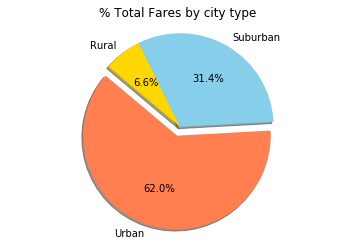

In [17]:
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [40078.34, 20335.69, 4255.09]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to separate the "Python" section
# from the others
explode = [0.1, 0, 0]
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.axis("equal")
plt.title("% Total Fares by city type")
plt.show()

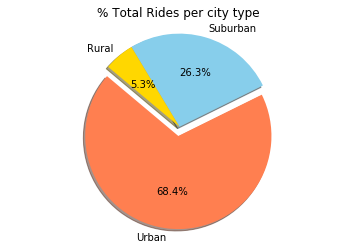

In [18]:
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [1625, 625, 125]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to separate the "Python" section
# from the others
explode = [0.1, 0, 0]
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.axis("equal")
plt.title("% Total Rides per city type")
plt.show()

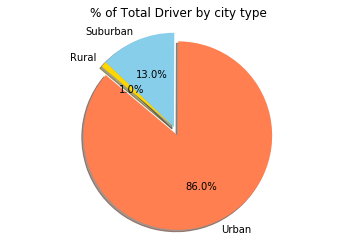

In [19]:
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [64501, 9730, 727]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to separate the "Python" section
# from the others
explode = [0.1, 0, 0]
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Driver by city type")
plt.show()

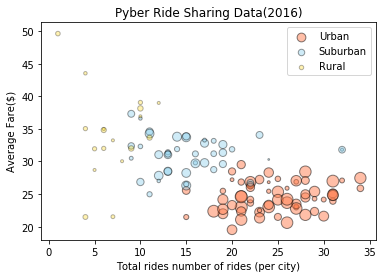

In [20]:
plt.scatter(city_fare_agg1.Ridecount, city_fare_agg1.AverageFare, s=(sort_data.driver_count)*2, marker="o",
            facecolors="coral", label ="Urban", alpha = 0.5, linewidths = '1', edgecolor = 'black')
plt.scatter(city_fare_agg2.Ridecount, city_fare_agg2.AverageFare, s=(sort_data1.driver_count)*3, marker="o",
            facecolors="skyblue", label ="Suburban", alpha = 0.4, linewidths = '1', edgecolor = 'black')
plt.scatter(city_fare_agg3.Ridecount, city_fare_agg3.AverageFare, s=(sort_data2.driver_count)*3, marker="o",
            facecolors="gold", label ="Rural", alpha = 0.3, linewidths = '1', edgecolor = 'black')
plt.legend(loc='best')
plt.xlabel("Total rides number of rides (per city)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data(2016)")
plt.show()